# [Machine Learning with CoreML](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-core-ml)
**By:** Joshua Newnham (Author)  
**Publisher:** [Packt Publishing](https://www.packtpub.com/) 

# Perceptual Losses for Real-Time Style Transfer and Super-Resolution

Keras implementation of the network described in <a href='https://arxiv.org/abs/1603.08155'>Perceptual Losses for Real-Time Style Transfer and Super-Resolution by Justin Johnson, Alexandre Alahi, Li Fei-Fei</a> in in March 2016. 

The implementation is based on what was described in the <a href='http://course.fast.ai/lessons/lesson9.html'>FastAI's course on Generative Models</a>.

In [1]:
%matplotlib inline
import importlib
import sys, os

from scipy.misc import imsave
import numpy as np
from PIL import Image # used to load images
import glob 

from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [19]:
TARGET_SIZE = (320,320)

## Training Data 

Dataset from Fast.ai and can be downloaded from <a href='http://files.fast.ai/data/imagenet-sample-train.tar.gz'>here</a>. 

In [20]:
path = '/data/datasets/imagenet/samples/'

In [21]:
fnames = glob.glob(path+'**/*.JPEG', recursive=True)
n = len(fnames); n

19439

In [25]:
fn = fnames[50]
fn

'/data/datasets/imagenet/samples/train/n02795169/n02795169_6950.JPEG'

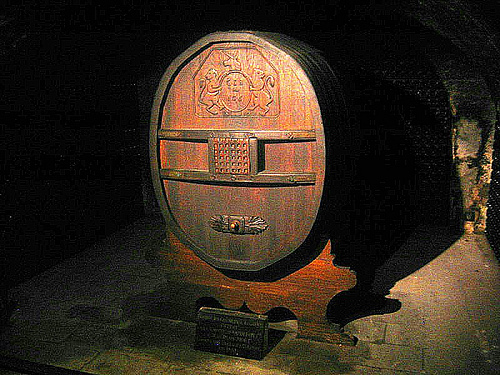

In [26]:
img=Image.open(fnames[50])
img

### Preprocessing 

We'll be using this image with VGG16. Therefore, we need to subtract the mean of each channel of the imagenet data and reverse the order of RGB->BGR since those are the preprocessing steps that the VGG authors did - so their model won't work unless we do the same thing.

In [27]:
def load_resize_image(img_path, target_size=TARGET_SIZE):
    """
    
    """
    # Load image 
    img = Image.open(img_path)
    if img.mode is not "RGB":
        img = img.convert('RGB')
    
    # Get dimensions
    img_width, img_height = img.size
    half_img_width, half_img_height = img_width/2.0, img_height/2.0

    # Crop
    target_width = min(img_width, img_height)
    target_height = min(img_width, img_height)

    left = half_img_width - target_width/2
    top = half_img_height - target_height/2
    right = half_img_width + target_width/2
    bottom = half_img_height + target_height/2

    img = img.crop((left, top, right, bottom))

    # Resize 
    img = img.resize(target_size)
    
    return img 

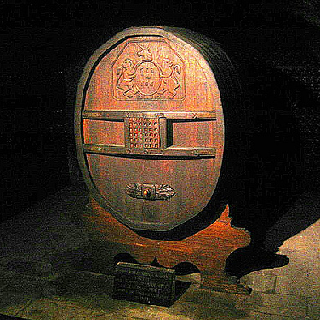

In [28]:
img=load_resize_image(fnames[50])
img

In [29]:
for fname in fnames:
    img = load_resize_image(fname)
    
    fname_parts = os.path.split(fname) 
    fname_parts = [part.replace("imagenet", "imagenet_small") for part in fname_parts]
    
    if not os.path.exists(fname_parts[0]):
        os.makedirs(fname_parts[0])
                
    img.save(os.path.join(fname_parts[0], fname_parts[1]))